In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('books.csv', on_bad_lines='skip')
df=df.drop(['Unnamed: 12'], axis=1)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


C:\Users\Atharva Prabhu\AppData\Local\Temp\ipykernel_7540\3214253732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='inferno')


<Axes: xlabel='average_rating', ylabel='title'>

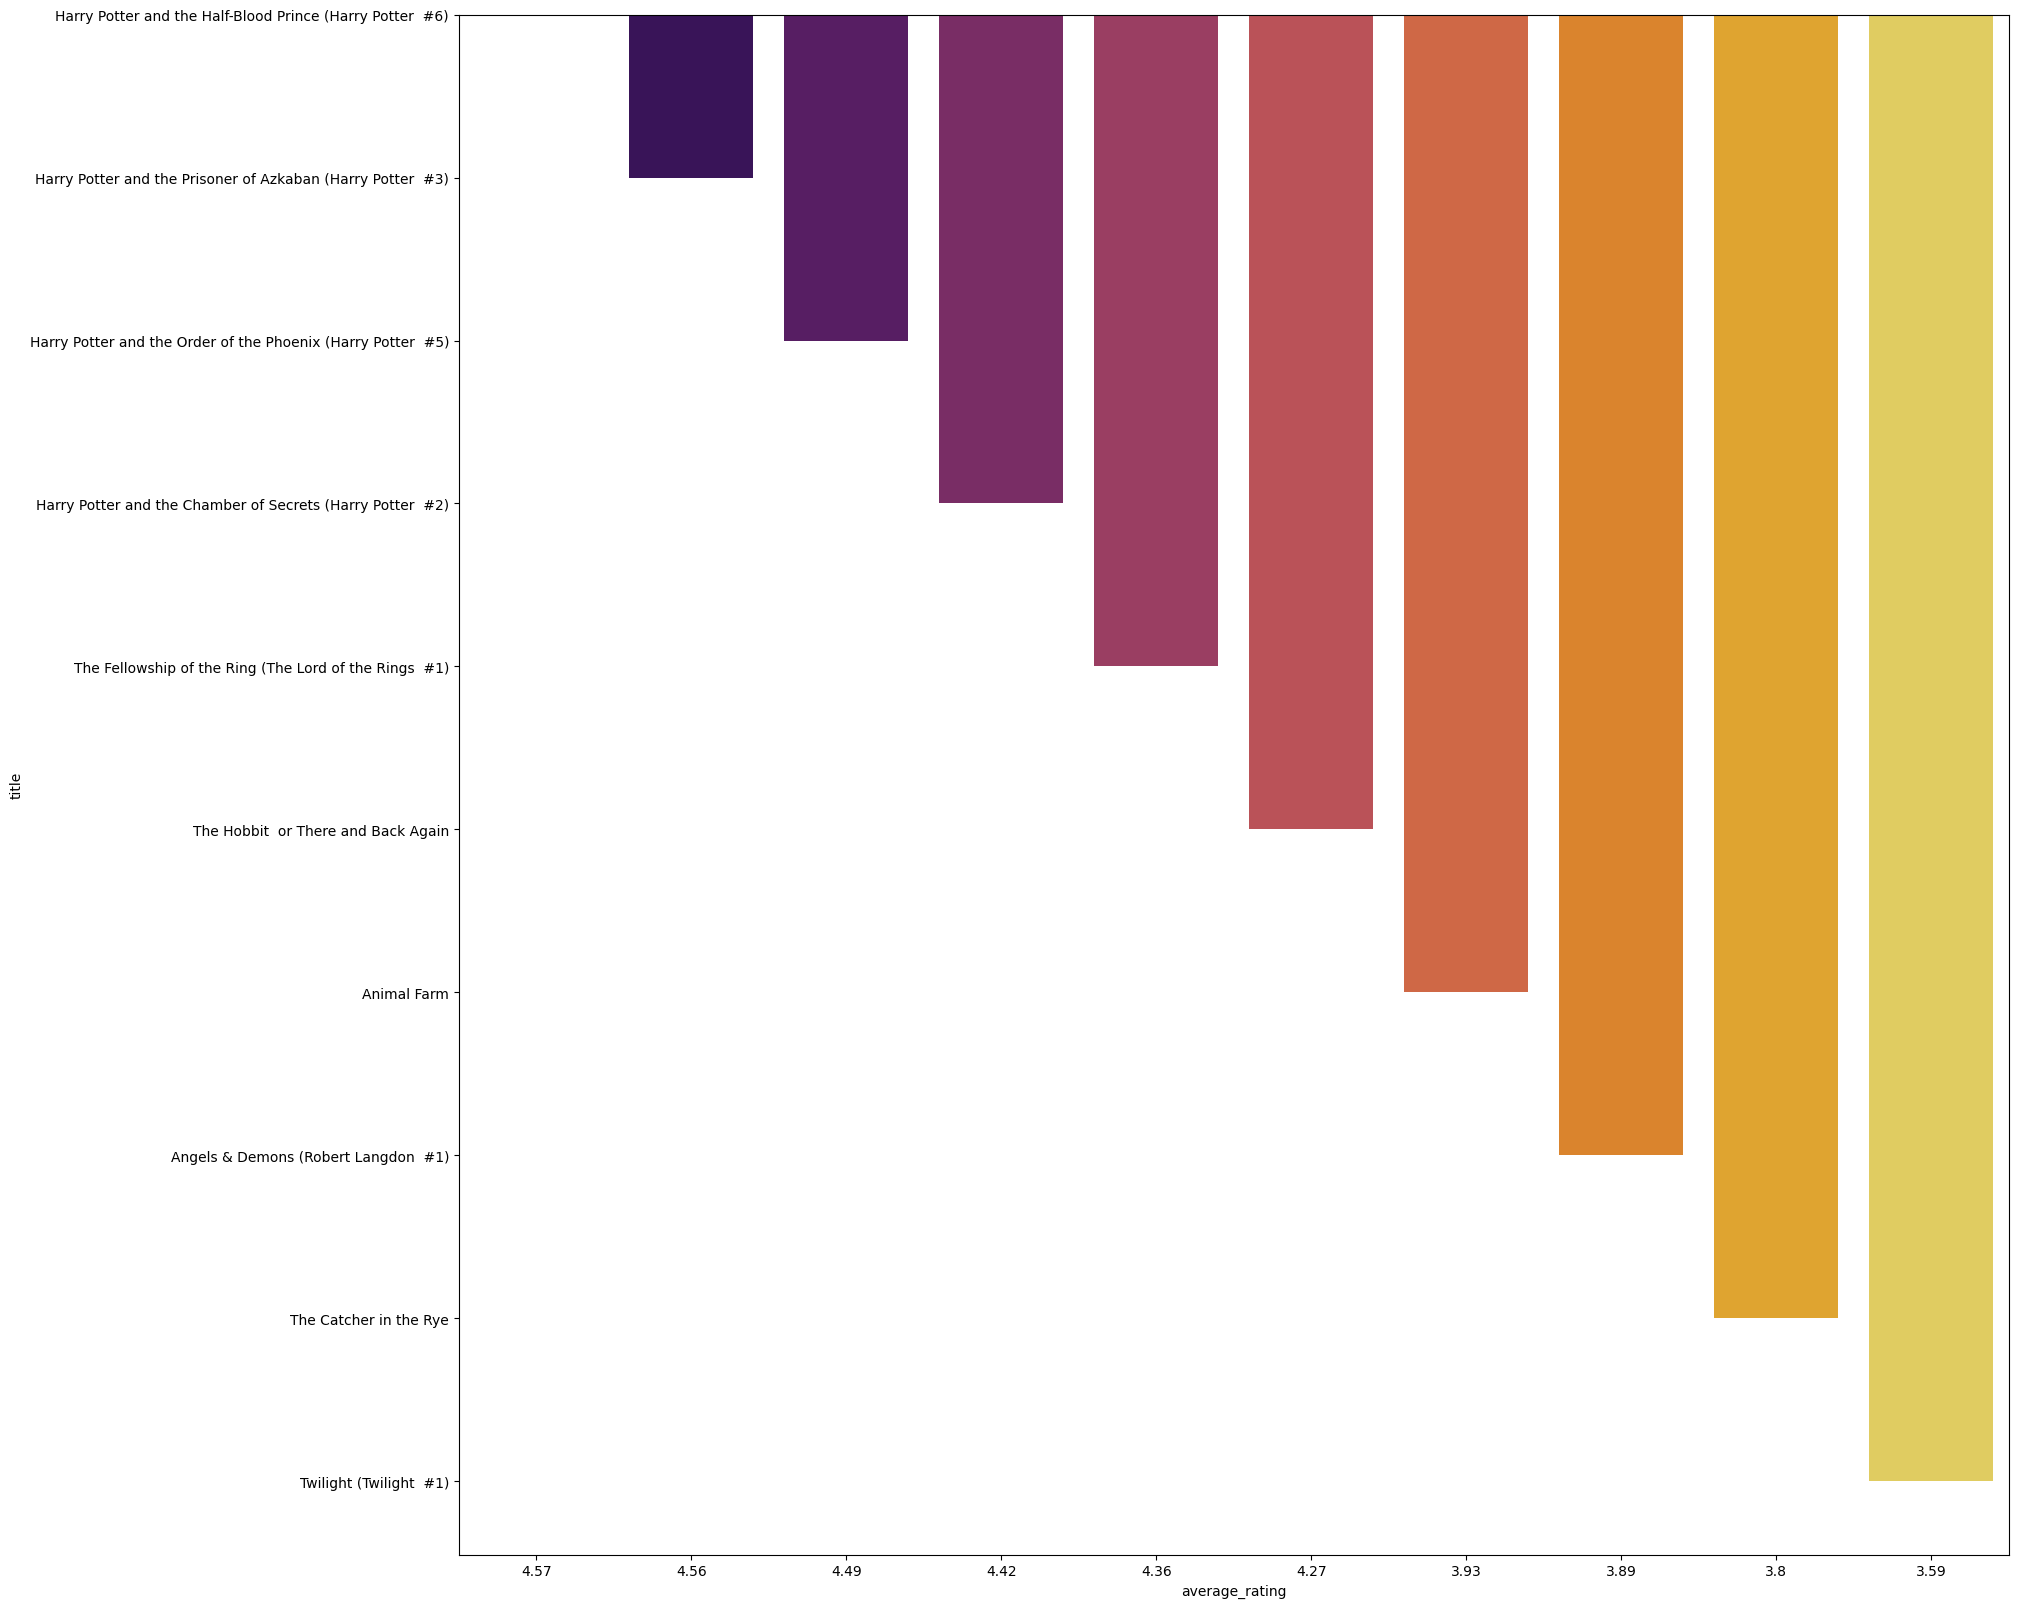

In [2]:
df.isnull().sum()
df.info()
df.describe()
top_ten=df[df['ratings_count']>1000000]
top_ten=top_ten.sort_values(by='ratings_count', ascending=False).head(10)
top_ten_rating=top_ten.sort_values(by='average_rating', ascending=False)
 
# plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20,20))
sns.barplot(x="average_rating", y="title", data=top_ten_rating, palette='inferno')

C:\Users\Atharva Prabhu\AppData\Local\Temp\ipykernel_7540\593330139.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=book_aut['title'], y=book_aut.index, palette='inferno')


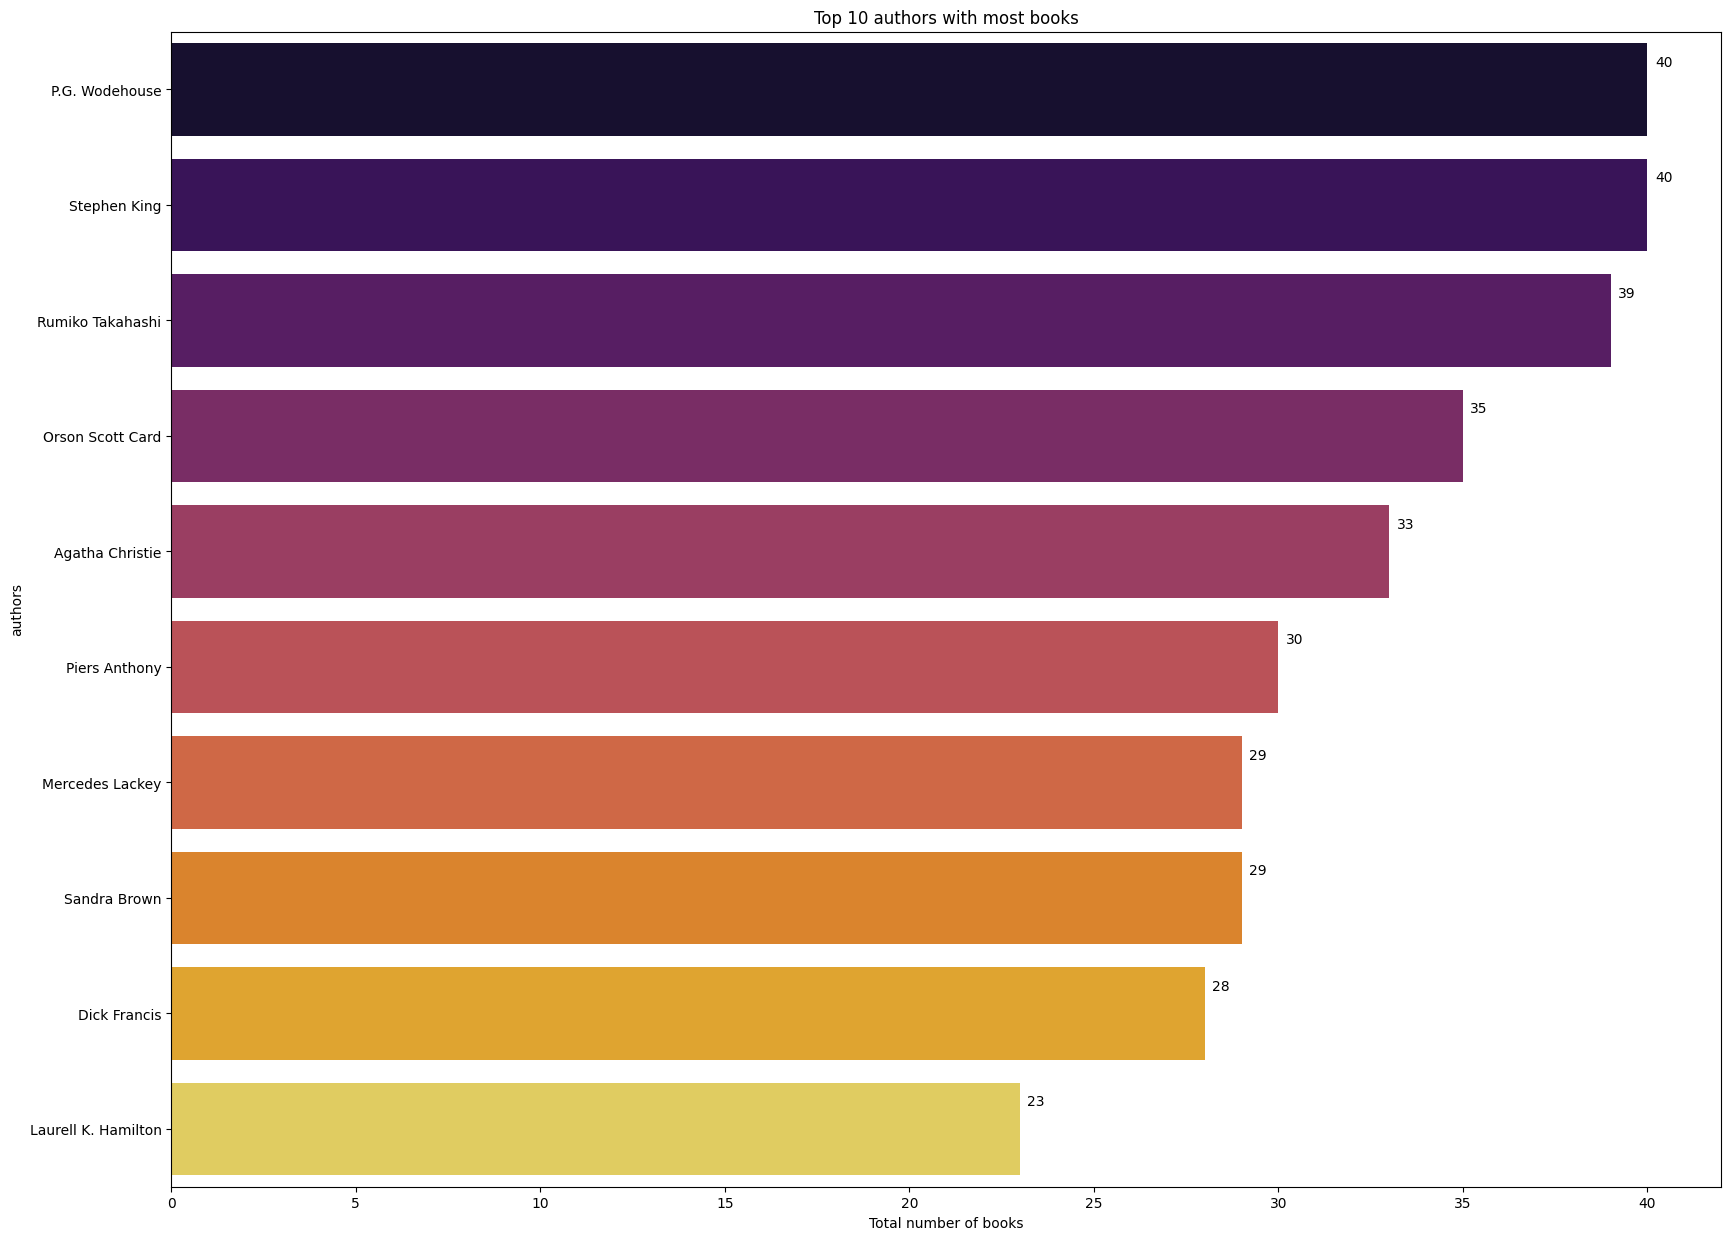

In [3]:
book_aut = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
book_aut
plt.figure(figsize=(20, 15))
ax = sns.barplot(x=book_aut['title'], y=book_aut.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

C:\Users\Atharva Prabhu\AppData\Local\Temp\ipykernel_7540\991159951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_ten['ratings_count'], y=top_ten['title'], palette='inferno')


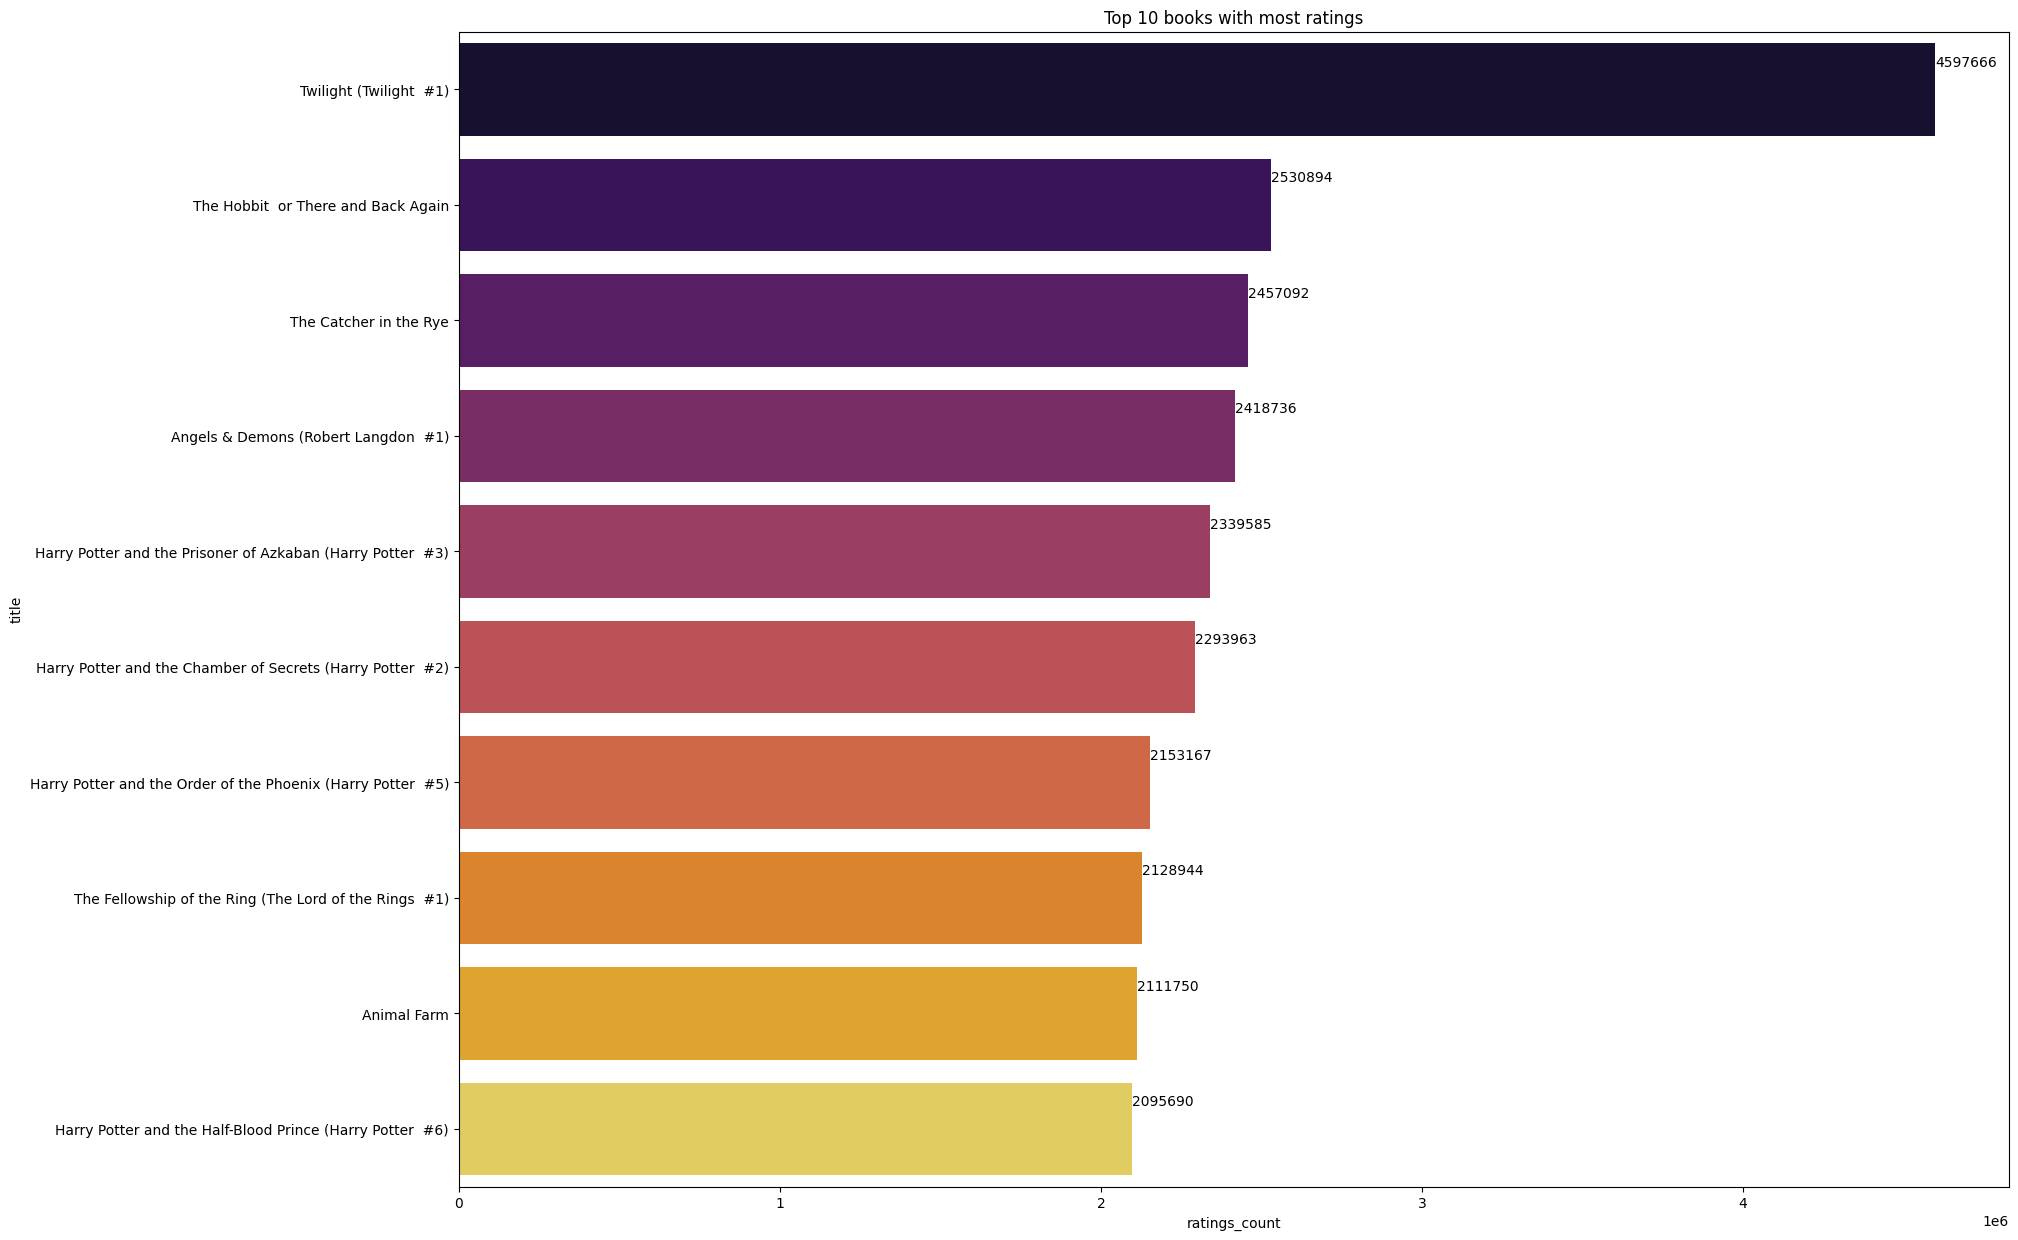

In [4]:
plt.figure(figsize=(20,15))

ax = sns.barplot(x=top_ten['ratings_count'], y=top_ten['title'], palette='inferno')
ax.set_title("Top 10 books with most ratings")


total=[]

for i in ax.patches:
    total.append(i.get_width())
    
totals=sum(total)

for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2, str(round(i.get_width())))

plt.show()

C:\Users\Atharva Prabhu\AppData\Local\Temp\ipykernel_7540\3731389616.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], ax=ax)


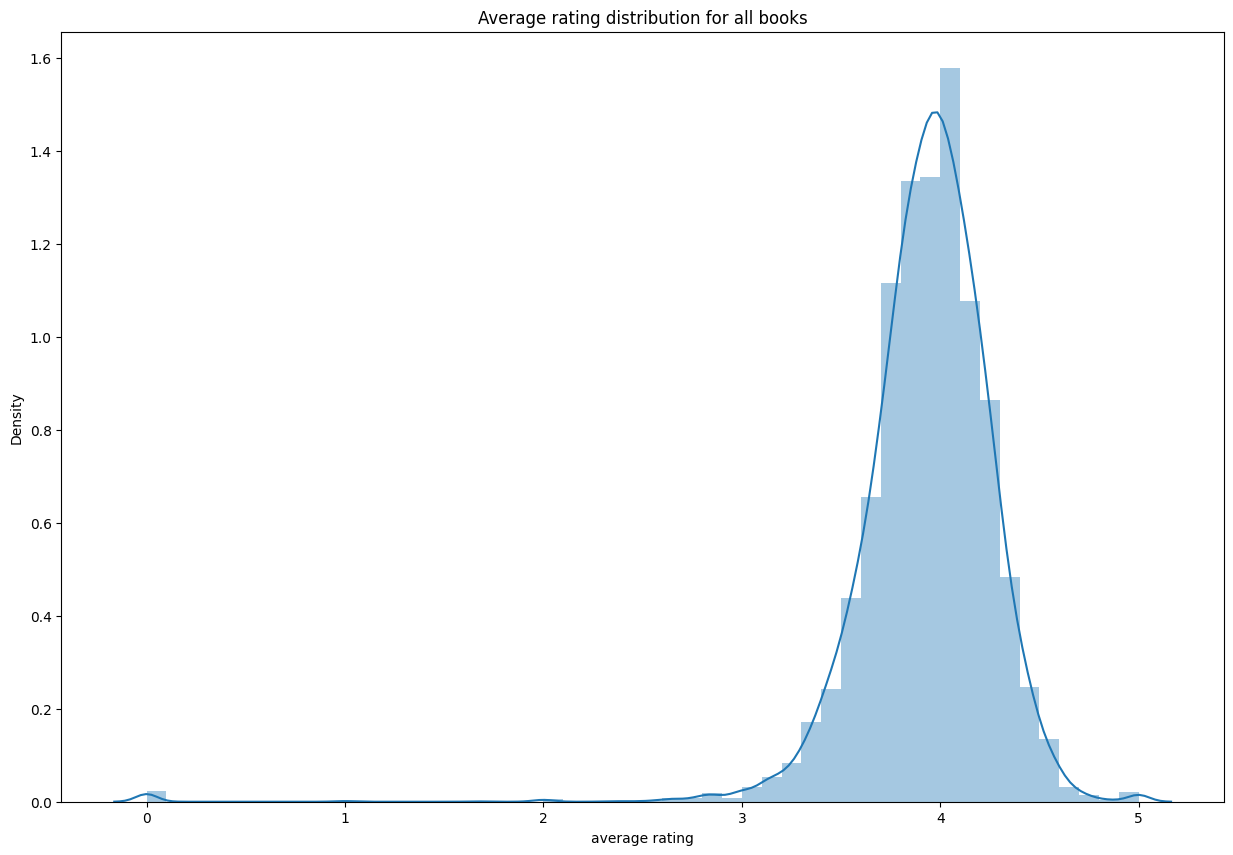

<Figure size 2000x2000 with 0 Axes>

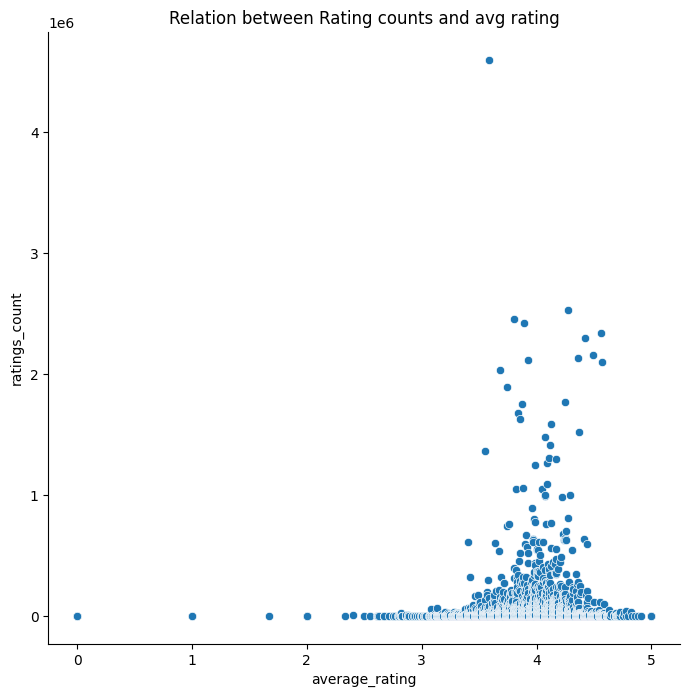

In [5]:
df=df.sort_values('average_rating').reset_index()
df=df.iloc[4:]
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

<Figure size 2000x2000 with 0 Axes>

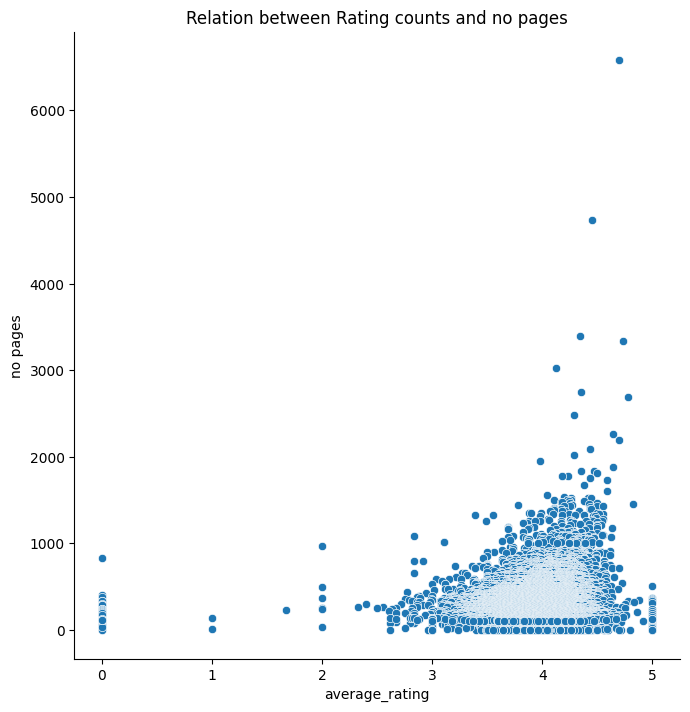

In [6]:
df=df.sort_values('num_pages', ascending=False).reset_index()
df=df.iloc[4:]
df.head(20)
df.num_pages=df.num_pages.astype(float)
plt.figure(figsize=(20,20))
ax=sns.relplot( x="average_rating", y="num_pages",data=df,sizes=(400,200), height=7)
plt.title('Relation between Rating counts and no pages')
ax.set_axis_labels("average_rating", "no pages")

In [7]:
df2=df.copy()
df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"
df2.sort_values('average_rating')
rating_df=pd.get_dummies(df2['rating between'])
language_df=pd.get_dummies(df2['language_code'])
feature=pd.concat([rating_df, language_df, df2['average_rating'], df2['ratings_count']], axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
feature=minmax.fit_transform(feature)
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model=neighbors.NearestNeighbors(n_neighbors=8, algorithm='ball_tree')

model.fit(feature)

dist, idlist=model.kneighbors(feature)
def bookRecom(name):
    book_list=[]
    book_id=df2[df2['title']==name].index
    book_id=book_id[0]
    for new in idlist[book_id]:
        book_list.append(df2.loc[new].title)
    return book_list

Book_name=bookRecom('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
Book_name

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'The Feelings Book: The Care & Keeping of Your Emotions',
 'The Complete Shorter Fiction of Virginia Woolf',
 'Warrior of the Light',
 'The Known World',
 'Hour Game (Sean King & Michelle Maxwell  #2)',
 "The Art of Innovation: Lessons in Creativity from IDEO  America's Leading Design Firm",
 'Blink: The Power of Thinking Without Thinking']

In [9]:
import pickle

# Save processed DataFrame
df2.to_pickle("books_df2.pkl")

# Save features and model
with open("features.pkl", "wb") as f:
    pickle.dump(feature, f)
with open("knn_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("idlist.pkl", "wb") as f:
    pickle.dump(idlist, f)